<a href="https://colab.research.google.com/github/AgentWombat/Single_Variable_Linear_Regression_Tutorial/blob/main/Workshop_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Linear Regression?
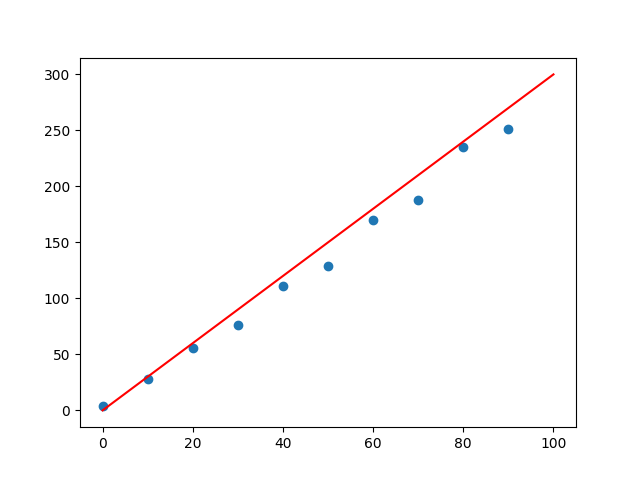

Linear Regression is finding a linear relationship betweeen input/output pairs. For single value inputs, this is equivilant to finding the equation to the line of best fit (y = mx + b) for the data.
Link to full presentation: https://docs.google.com/presentation/d/1s829hTo5zgYgyMs4XHJY6PYVJT4WYOhKqnuQ7nMQkIE/edit?usp=sharing

# Coding a Linear Regression Model

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

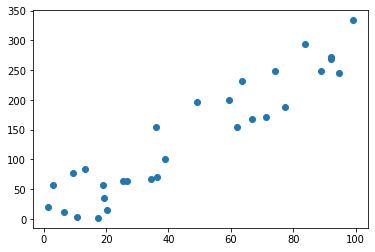

In [ ]:
# Making test data

# array with 30 random elements from 0 to 100
X = np.random.rand(30)*100

# NumPy allows for operations to apply element-wise
# y ~= 3x
# I add 50*sin(17*x) to add some "randomness" to the data
Y = 3*X +50*np.sin(17*X)

# Plot the data
plt.scatter(X,Y)

plt.show()


In [ ]:
# Initializing variables
# In linear regression, we assume a maping from x to y of the form y = mx + b
# instead of 'm' for slope and 'b' for intercept, we use 'w' for weight
# and 'b' for bias
# We have to start with a guess, so set w = 1 and b = 1

w = 1

b = 1

#predict an output for a given input
def predict(x,w,b):
  return w*x + b

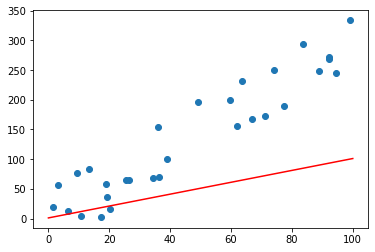

In [ ]:
# Plot guess on graph


plt.scatter(X,Y, label = 'data')
plt.plot([0,100], [predict(0,w, b), predict(100,w,b)], label = 'guess', color = 'red')

plt.show()

In [ ]:
# Define a cost function
# We will use Mean Squared error (MSE)

def MSE(X, Y, w, b):

  # The length of our input data is how many input/output pairs we have

  N = len(X)

  # Calculate sum of squared error for all input/output pairs
  squared_error = 0
  for i in range(N):

    squared_error += (Y[i] - (X[i]*w + b))**2

  # "cost" is the average squared error
  cost = squared_error/N

  return cost


In [ ]:
# Test cost function

MSE(X,Y, w, b)

12839.729877993968

In [ ]:
# Define cost-function derivate functions (gradient function)
# We will code one function which returns the gradient as touple

def MSE_gradient(X,Y, w, b):

  N = len(X)
  # Calculate sum of gradients for all input/output pairs
  # using d/dw [MSE] and d/db [MSE]
  w_gradient = 0
  b_gradient = 0
  for i in range(N):

    w_gradient += -2*X[i]*(Y[i] - (X[i]*w +b))

    b_gradient += -2*(Y[i] -(X[i] +b))

  w_gradient /= N

  b_gradient /= N
  
  #get average of the sum of gradients
  return w_gradient, b_gradient

In [ ]:
# Define function to fit data to model. 
# We pass in the data and the number of epochs (iterations) we want the model
# to calculate and the rate at which it is to learn (learning_rate)
def fit(X,Y, epochs, learning_rate):

  # Set w and b to 1 as a guess (this could be another number)
  w = 1

  b = 1

  # Update w and b values based on gradient and learning_rate
  for i in range(epochs):

    # Get gradient
    w_gradient, b_gradient = MSE_gradient(X, Y, w, b)

    # The sign of the gradient tells us the direction of steepest ascent.
    # We want the direction of steepest decent, so instead of adding
    # a multiple of the gradient, we subtract a multiple of the gradient

    w -= w_gradient * learning_rate

    b -= b_gradient * learning_rate

  return w, b


In [ ]:
# Fit model to data
w, b = fit(X, Y, 10, 0.0001)

#check weight and bias values
print(w,b)


2.929787518652622 1.1789745767169617


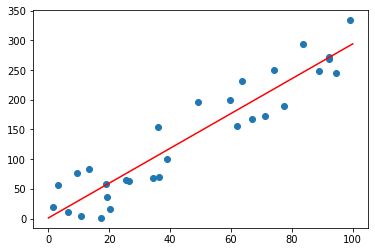

In [ ]:
# Graph model and compare to results

plt.scatter(X,Y, label = 'data')
plt.plot([0,100], [predict(0,w, b), predict(100,w,b)], label = 'guess', color = 'red')
plt.show()